<a href="https://colab.research.google.com/github/PatrickRuan/ML100Days/blob/master/homework/1129EDA%E9%81%8E%E9%97%9C%E7%B7%B4%E7%BF%923.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

drive.mount('/content/drive/')
path = 'drive/My Drive/學習/Cupoy/ML100_5/d004_data/'
!cp -r drive/'My Drive'/學習/Cupoy/ML100_5/d004_data/ ./
os.chdir('/content')
os.chdir('./d004_data')
#os.chdir('/content/')
df_app = pd.read_csv('application_train.csv')
print(df_app.shape)
df_app.head(3)

ls_fc = []
ls_ic = []
ls_oc = []
for i in df_app.columns:
  if df_app[i].dtype == 'float64':
    ls_fc.append(i)
  elif df_app[i].dtype == 'int64':
    ls_ic.append(i)
  else: 
    ls_oc.append(i)
ls_nc1 = ls_fc + ls_ic

print(len(ls_fc), len(ls_ic), len(ls_oc), len(ls_nc1), '\n', ls_oc)

os.chdir('/content/')
!cp -r drive/'My Drive'/學習/Cupoy/ML100_5/d007_data/ .
os.chdir('./d007_data')
df_house_tr = pd.read_csv('house_train.csv.gz')
df_house_tt = pd.read_csv('house_test.csv.gz')

ls_nc2, ls_oc2, ls_fc2, ls_ic2 = [], [], [], []

for c,t in zip(df_house_tr.columns, df_house_tr.dtypes):
  if (t == 'float64') or (t == 'int64'):
    ls_nc2.append(c)
  else: ls_oc2.append(c)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
cp: cannot stat 'drive/My Drive/學習/Cupoy/ML100_5/d004_data/': No such file or directory
(307511, 122)
65 41 16 106 
 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [ ]:
from sklearn.linear_model import LogisticRegression
os.chdir('/content/')
os.chdir('d007_data')
data_path = 'data/'
data_path = ''

df_tt_tr = pd.read_csv('titanic_train.csv')
df_tt_tt = pd.read_csv('titanic_test.csv')

tt_tr_Y = df_tt_tr.Survived
train_num = tt_tr_Y.shape[0]
ids = df_tt_tt['PassengerId'] # 還原時用

df_tt_tr = df_tt_tr.drop(['Survived', 'PassengerId'], axis = 1)
df_tt_tt = df_tt_tt.drop(['PassengerId'], axis =1)
df_tt = pd.concat([df_tt_tr, df_tt_tt])

In [ ]:
ls_nc3 = []
ls_oc3 = []
for c, t in zip(df_tt.columns, df_tt.dtypes):
  if t == 'object':
    ls_oc3.append(c)
  else: ls_nc3.append(c)
#print(df_tt[ls_nc3])
#print(df_tt[ls_oc3])
df_tt = df_tt[ls_nc3]

# 【練習 25: Application 對欄資料作分群】 
# 對某一欄資料作分群:
### 請將 df_app 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    - 0 個小孩
    - 有 1 - 2 個小孩
    - 有 3 - 5 個小孩
    - 有超過 5 個小孩
  - ### pd.cut(df, bins=cut_rule)



In [ ]:
cut_rule = [-np.inf, 0,2,5, np.inf]


[-inf, 0, 2, 3, 5, inf]

In [ ]:
df_app['CNT_CHILDREN'].describe()
cut_rule = [-np.inf,0,2,5, np.inf]
df_app['CNT_CHILDREN_GROUP'] = pd.cut(df_app['CNT_CHILDREN'], bins = cut_rule)

In [ ]:
df_app[['CNT_CHILDREN', 'CNT_CHILDREN_GROUP']]
df_app['CNT_CHILDREN_GROUP'].value_counts()

(-inf, 0.0]    215371
(0.0, 2.0]      87868
(2.0, 5.0]       4230
(5.0, inf]         42
Name: CNT_CHILDREN_GROUP, dtype: int64

#【練習 26: application, -quantile, percential, (q)cut, groupby】
分群除了 quantile, percentile, cut, 不要忘了 groupby
  - 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
  - df_app.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))







In [ ]:
grp = ['CNT_CHILDREN_GROUP', 'TARGET']
grouped_df = df_app.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
(-inf, 0.0]         0         166747.010980
                    1         160804.210548
(0.0, 2.0]          0         174590.584401
                    1         176115.362720
(2.0, 5.0]          0         175053.742913
                    1         160677.385714
(5.0, inf]          0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

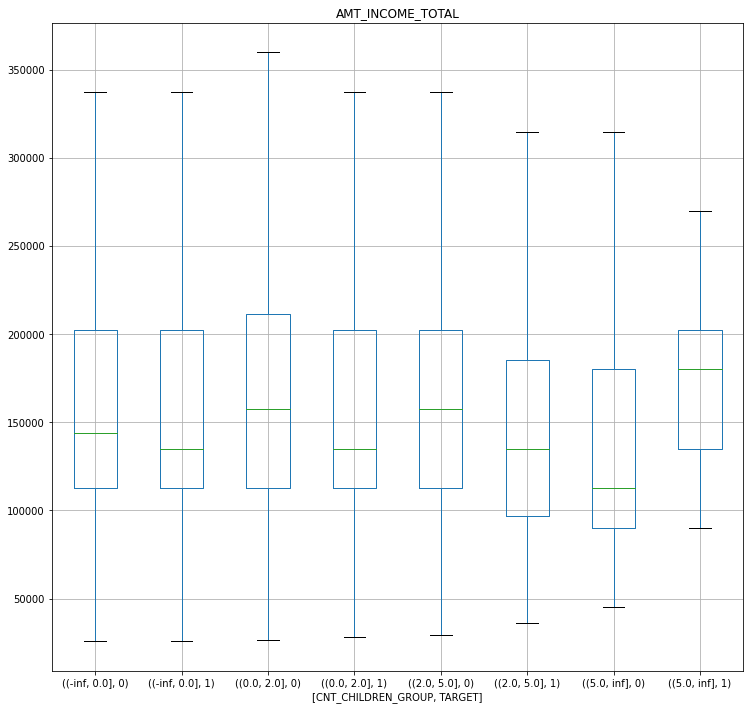

In [ ]:
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']

df_app.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

#【練習 27: application, groupby then z transfer】
請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數

In [ ]:
df_app['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:(x-np.mean(x))/np.std(x))

# 【練習 28: None】 Corrlation 正負相關


-0.04032484704738108


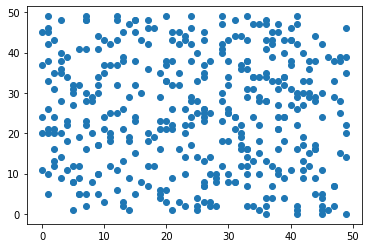

In [ ]:
x = np.random.randint(0, 50, 400)
y = np.random.randint(0, 50, 400)
print(np.corrcoef(x, y)[0][1])
plt.scatter(x,y)

0.8570601954971002


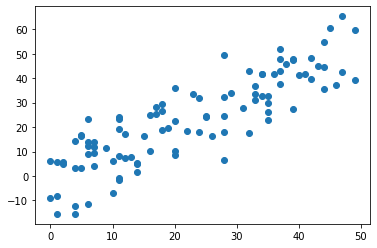

In [ ]:
x = np.random.randint(0, 50, 100)
y = x + np.random.normal(0, 10, 100)
print(np.corrcoef(x, y)[0][1])
plt.scatter(x,y)

0.6933202506867961


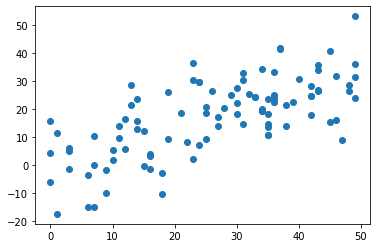

In [ ]:
x = np.random.randint(0, 50, 100)
y = 0.7*x - np.random.normal(0, 10, 100)
print(np.corrcoef(x, y)[0][1])
plt.scatter(x,y)

# 【練習 29 application 去除max 值的row df[條件]練習】
# Correlation
- 觀察 'DAYS_EMPLOYED' 與 'AMT_INCOME_TOTAL' 的關係


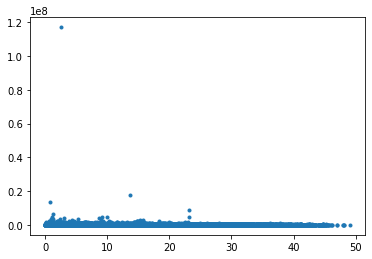

In [ ]:
sub_app = df_app[df_app.DAYS_EMPLOYED != df_app.DAYS_EMPLOYED.max()]
plt.plot(sub_app['DAYS_EMPLOYED'] / (-365), sub_app['AMT_INCOME_TOTAL'], '.')

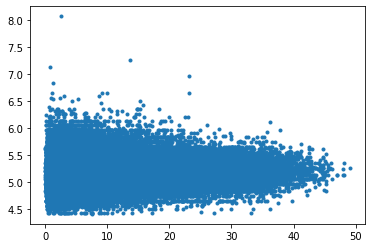

In [ ]:
np.log10
plt.plot(sub_app['DAYS_EMPLOYED'] / (-365), np.log10(sub_app['AMT_INCOME_TOTAL']), '.')

工作愈久的人，彼此間的薪資變異數變小

# 【練習 30: application pd.corr()['Target']】 Corrlation
- 列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個
- ## hint: pd.corr()['Target'] 這樣的寫法有點難懂
- abs(df_app.corr()['TARGET']).sort_values(ascending=False)
- 繪圖並觀察相關係數最高的: EXT_SOURCE_3 


In [ ]:
correlation = abs(df_app.corr()['TARGET']).sort_values(ascending=False)

print(correlation.head(5), '\n')
print(correlation.tail(3))

TARGET          1.000000
EXT_SOURCE_3    0.178919
EXT_SOURCE_2    0.160472
EXT_SOURCE_1    0.155317
DAYS_BIRTH      0.078239
Name: TARGET, dtype: float64 

FLAG_DOCUMENT_5                              3.157774e-04
FLAG_DOCUMENT_20                             2.153936e-04
AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET    3.425206e-17
Name: TARGET, dtype: float64


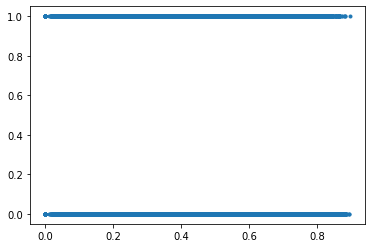

In [ ]:
plt.plot(df_app.EXT_SOURCE_3, df_app.TARGET, '.')

看不出甚麼, 但是...

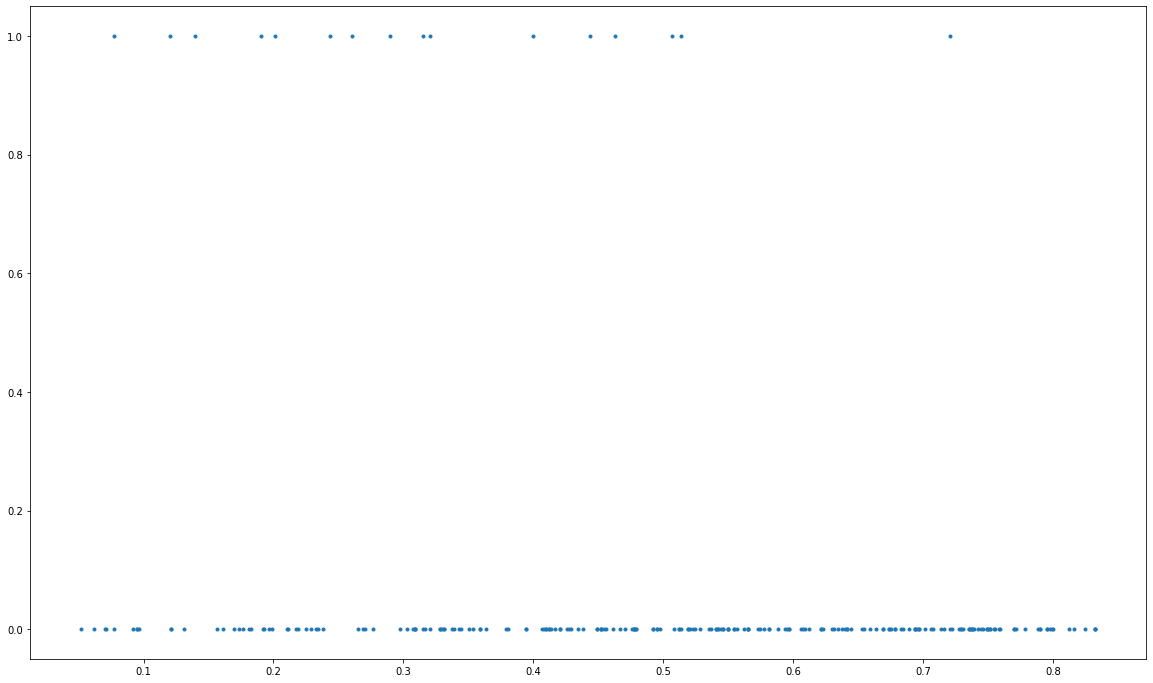

In [ ]:
plt.figure(figsize = (20,12))
plt.plot(df_app.EXT_SOURCE_3[:300], df_app.TARGET[:300], '.')

似乎... 對應 target =0 的 Ext_Source_3 有比較高的中位值

Text(0.5, 1.0, 'clear~~')

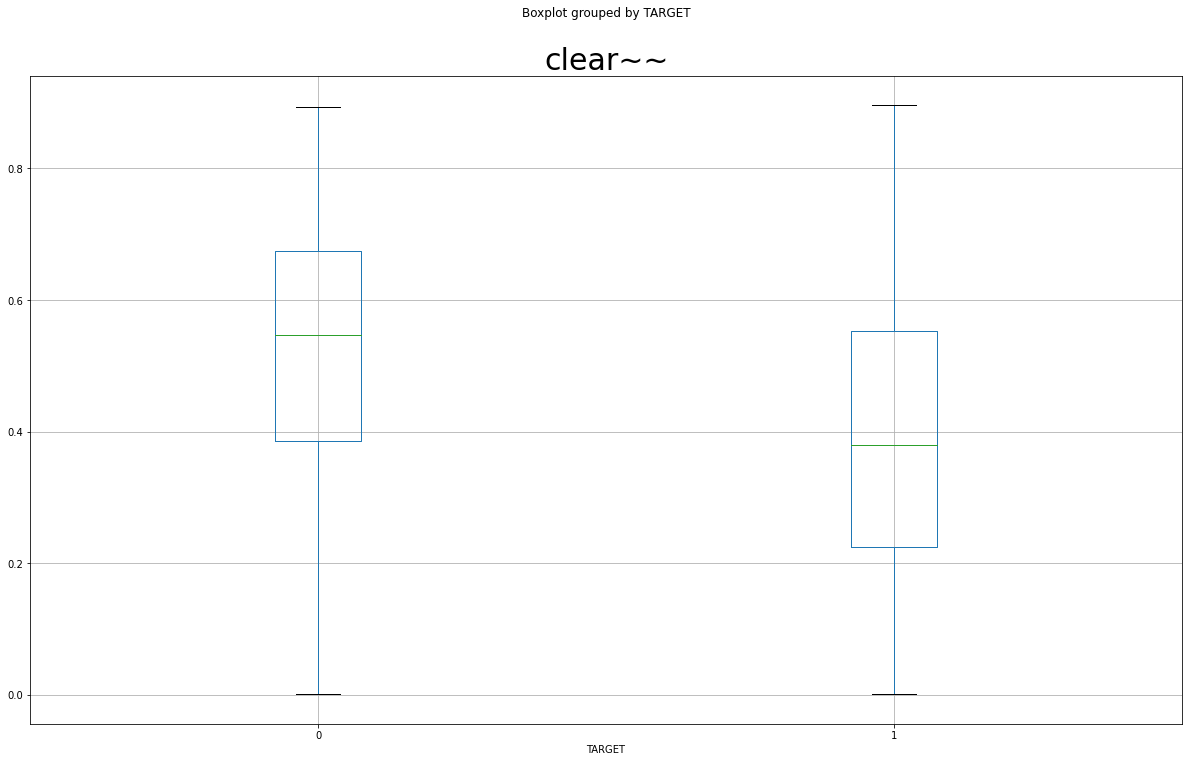

In [ ]:
df_app.boxplot(by='TARGET', column='EXT_SOURCE_3', figsize=(20,12))
plt.title('clear~~',fontsize = 30)

#【練習 31: application  plt.hist and *kde*】 plt.hist and *kde*

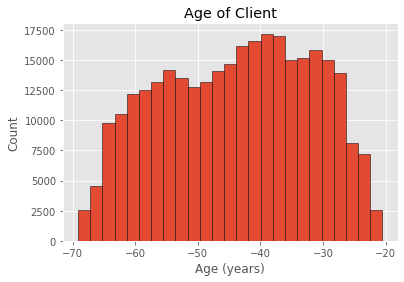

In [ ]:
# 改變繪圖樣式 (style)
plt.style.use('ggplot') 

# 改變樣式後再繪圖一次, 比較效果
plt.hist(df_app['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

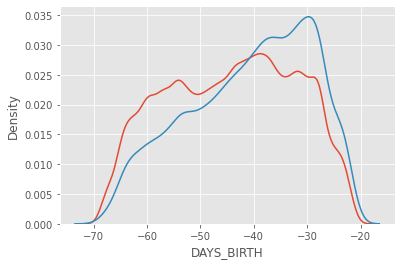

In [ ]:
sns.kdeplot(df_app.loc[df_app['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
# KDE plot: 不會準時還貸者 - 下圖藍線
sns.kdeplot(df_app.loc[df_app['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# 【練習 32 application bin_cut, cut_rule】
- 除了直接觀察變項以外，我們也可以分群比較
- 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
以年齡區間為 x, target 為 y 繪製 barplot
- 好好學習 print(age_data['YEARS_BINNED'].value_counts())


In [ ]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
df_app['DAYS_BIRTH'] = abs(df_app['DAYS_BIRTH'])

In [ ]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = df_app[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age
#自 20 到 70 歲，切 11 個點 (得到 10 組)

bin_cut =  np.linspace(20,70, 11)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 


# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


#  【練習 33: None, cut, qcut, and cut(rule) 與等寬等頻切分練習】 cut, qcut, and cut(rule)
- 製作一個 dataframe single columns with integers 
- create new columns to cut first column.value to 4 portions with same width **hint** cut(data, n)
- to create a new column to divide first column.value to 4 portions with same elements q'ty **hint** qcut(data, n)
- cut_rule **hint** cut(data, bins=cut_rule)

In [ ]:
# 初始設定 Ages 的資料
ages = pd.DataFrame({"age": [18,22,25,27,7,21,23,37,30,61,45,41,9,18,80,100]})

In [ ]:
# 新增欄位 "equal_width_age", 對年齡做等寬劃分
ages["equal_width_age"] = pd.cut(ages["age"], 4)
# 觀察等寬劃分下, 每個種組距各出現幾次
ages["equal_width_age"].value_counts() # 每個 bin 的值的範圍大小都是一樣的

(6.907, 30.25]    10
(30.25, 53.5]      3
(76.75, 100.0]     2
(53.5, 76.75]      1
Name: equal_width_age, dtype: int64

In [ ]:
# 新增欄位 "equal_freq_age", 對年齡做等頻劃分
ages["equal_freq_age"] = pd.qcut(ages["age"], 4)
# 觀察等頻劃分下, 每個種組距各出現幾次
ages["equal_freq_age"].value_counts() # 每個 bin 的資料筆數是一樣的

(42.0, 100.0]     4
(26.0, 42.0]      4
(20.25, 26.0]     4
(6.999, 20.25]    4
Name: equal_freq_age, dtype: int64

In [ ]:
# (0, 10], (10, 20], (20, 30], (30, 50], (50, 100] 
cut_rule = [-np.inf, 10, 20, 30, 50, 100]

#ages["customized_age_grp"] = pd.cut(ages["age"], [0, 10, 20, 30, 50, 100])

ages["customized_age_grp"] = pd.cut(ages["age"], bins = cut_rule)
ages.head()

,age,equal_width_age,equal_freq_age,customized_age_grp
0,18,"(6.907, 30.25]","(6.999, 20.25]","(10.0, 20.0]"
1,22,"(6.907, 30.25]","(20.25, 26.0]","(20.0, 30.0]"
2,25,"(6.907, 30.25]","(20.25, 26.0]","(20.0, 30.0]"
3,27,"(6.907, 30.25]","(26.0, 42.0]","(20.0, 30.0]"
4,7,"(6.907, 30.25]","(6.999, 20.25]","(-inf, 10.0]"


# 【練習 34 application 連續型特徵離散化】】
- 先前看到個特徵值資料與 Target 的相關係數，我們試圖改善一些相關性低的特徵，請研究下方的例子。

##### **連續型特徵離散化**
雖然由之前的分析發現 DAYS_BIRTH 與 TARGET 的相關係數只有 -0.07，  
但在往後的課程裡，為了實際解決問題，我們將需透過一些處理方法，改善相關係數。  
目前我們先以對資料的常識理解，去觀察這兩個欄位的交叉狀況。




In [ ]:
# 先來看看 'DAYS_BIRTH' 的統計描述吧 (pandas.describe())
print("Correlation between TARGET and DAYS_BIRTH", df_app['DAYS_BIRTH'].corr(df_app['TARGET']))
(df_app['DAYS_BIRTH']/365).describe()

Correlation between TARGET and DAYS_BIRTH -0.07823930830982694


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

年齡最小是 20，最大是 69，那我們可以把年齡每 5 歲為一組後再來觀察其與預測目標的關係

In [ ]:
# 將年齡相關資料, 另外存成一個 DataFrame 來處理
age_data = df_app[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# 將年齡資料離散化 / 分組
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [ ]:
# 依照組別彙整年齡資料 "每一欄的平均值"
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


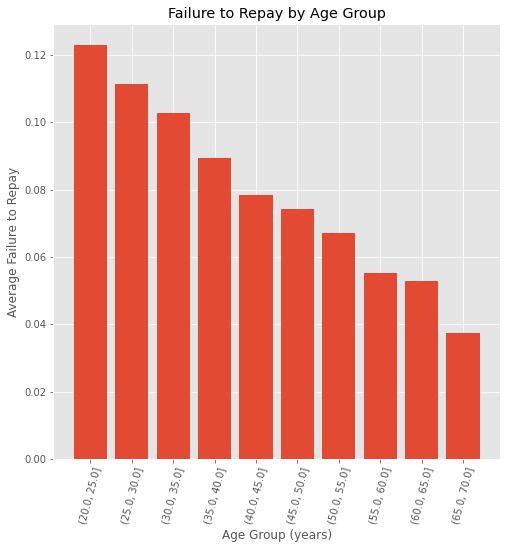

In [ ]:
plt.figure(figsize = (8, 8))

# 繪製目標值平均與分組組別的長條圖
plt.bar(range(len(age_groups.index)), age_groups['TARGET'])
# 加上 X, y 座標說明, 以及圖表的標題
plt.xticks(range(len(age_groups.index)), age_groups.index, rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Age Group');

可以非常明顯地看出趨勢，越年輕的客戶族群的違約遲繳的可能越大！

#  【練習 35 application subplot with kde(age)】】
- subplot 練習。
- 前一個練習的資料畫出各年齡層的 kde

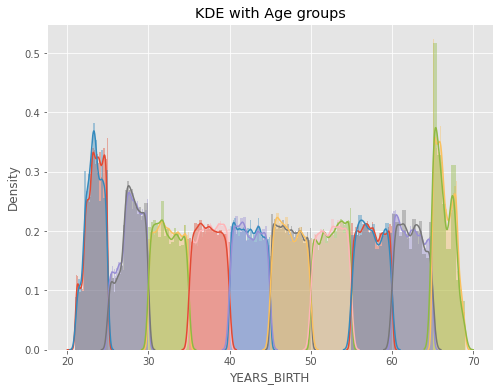

In [ ]:
# 資料分群後排序
year_group_sorted = np.sort(age_data['YEARS_BINNED'].unique())
age_data.head()

# 繪製分群後的 10 條 KDE 曲線
plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

# 【練習 36 application, subplot 練習】
# subplot 練習。
- 利用 x=[0,1] y =[0,1]... [0,1],[1,0]...[1,0],[0,1]...[1,0],[1,0]...[0,1],[0.5,0.5]...[0.5,0.5],[0,1]
劃出兩張子圖 **hint plt.subplt(321)...(322)...

- further study: plt.subplot(nrows, ncols, i+1)


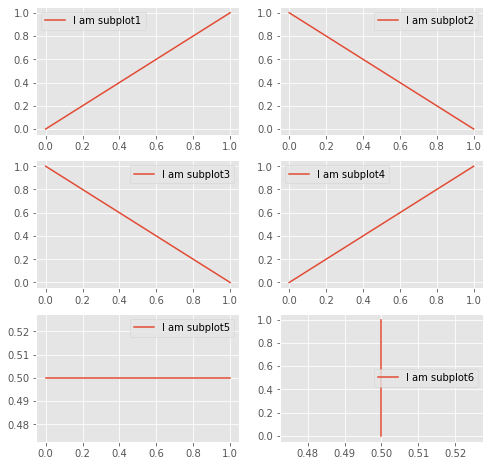

In [ ]:
# 每張圖大小為 8x8
plt.figure(figsize=(8,8))

# plt.subplot 三碼如上所述, 分別表示 row總數, column總數, 本圖示第幾幅(idx)
plt.subplot(321)
plt.plot([0,1],[0,1], label = 'I am subplot1')
plt.legend()

plt.subplot(322)
plt.plot([0,1],[1,0], label = 'I am subplot2')
plt.legend()

plt.subplot(323)
plt.plot([1,0],[0,1], label = 'I am subplot3')
plt.legend()

plt.subplot(324)
plt.plot([1,0],[1,0], label = 'I am subplot4')
plt.legend()

plt.subplot(325)
plt.plot([0,1],[0.5,0.5], label = 'I am subplot5')
plt.legend()

plt.subplot(326)
plt.plot([0.5,0.5],[0,1], label = 'I am subplot6')
plt.legend()

plt.show()

#【練習 37 application  hist subplot圖】
subplot 練習。
## 要把 HOUSETYPE_MODE 裡面四種值作出四張 hist subplot圖

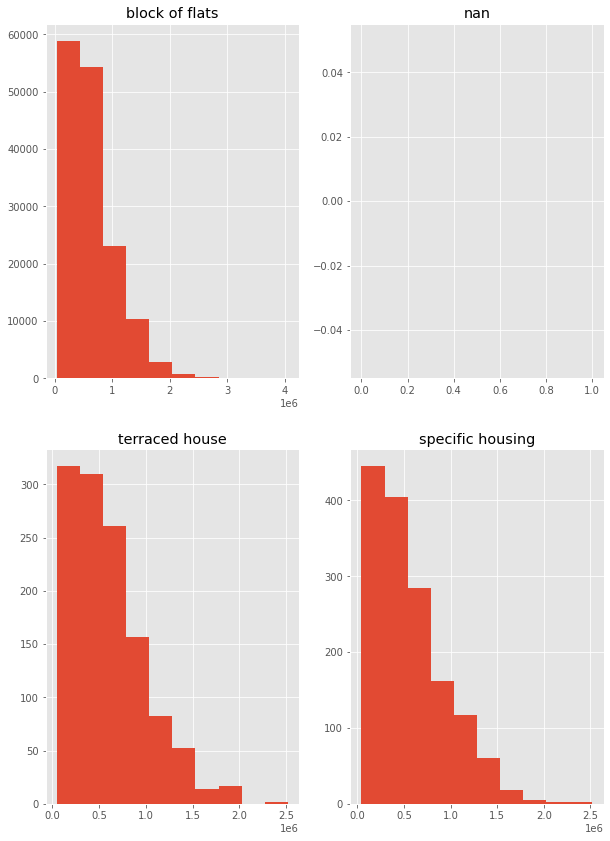

In [ ]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版
"""
Your Code Here
"""
## 要把 HOUSETYPE_MODE 裡面四種值作出四張圖
#unique_house_type = app_train['HOUSETYPE_MODE'].unique()
#unique_house_type = ['block of flats', nan, 'terraced house', 'specific housing'] #fail

unique_house_type = ['block of flats', 'nan', 'terraced house', 'specific housing']
nrows = len(unique_house_type)
ncols = nrows // 2


plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    """
    Your Code Here
    """
    df_app.loc[df_app['HOUSETYPE_MODE'] == unique_house_type[i], "AMT_CREDIT"].hist() 
    plt.title(str(unique_house_type[i]))
plt.show()  

#【練習 38 application sns.heatmap()】
#heatmap 練習。
## 把 前四高相關+ TARGET作 heatmap
## DAY_BIRTH... 需要取 abs

In [ ]:
# 取出 EXT_SOURCE 的幾項變數並檢驗其相關性
df_app['DAYS_BIRTH'] = abs(df_app['DAYS_BIRTH'])
ext_data = df_app[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


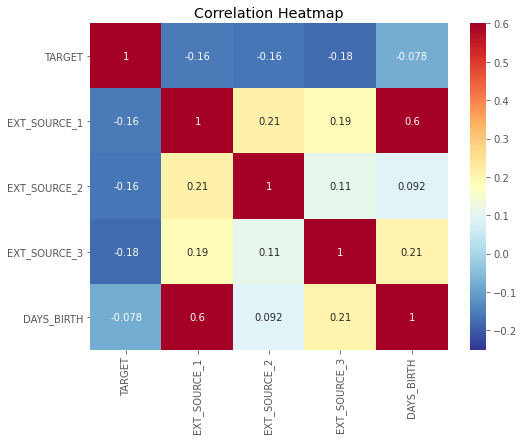

In [ ]:
plt.figure(figsize = (8, 6))
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

# 【[作業](https://drive.google.com/file/d/1V6Go8FTWaYyMyqlddIaorz3t2Zn1YniT/view?usp=sharing)】
請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# 【[final test](https://drive.google.com/file/d/14agVBdRyDGUZGNSlUW96nzk_JU8sHH4a/view?usp=sharing)】